In [1]:
import matplotlib
matplotlib.use('TkAgg')
%matplotlib inline
import pandas as pd
import geopandas as gp
import matplotlib.pyplot as plt
import contextily as ctx
import matplotlib.colors
import geoplot

cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["grey","yellow","blue"])

In [4]:
geo = gp.read_file("phoenix.shp")

In [5]:
geo["2_to_4_Multi_Family_Buildings"] = geo["MULTIS"].apply(lambda x: x if x<=100 else 100)

In [24]:
geo["percent_multis"] =  geo["MULTIS"]/geo["TOTAL_OCCU"]*100

In [6]:
def add_basemap(ax, zoom, url='http://tile.stamen.com/terrain/tileZ/tileX/tileY.png'):
    xmin, xmax, ymin, ymax = ax.axis()
    basemap, extent = ctx.bounds2img(xmin, ymin, xmax, ymax, zoom=zoom, url=url)
    ax.imshow(basemap, extent=extent, interpolation='bilinear')
    # restore original x/y limits
    ax.axis((xmin, xmax, ymin, ymax))

geo = geo.to_crs(epsg=3857)

In [3]:
geo.columns

Index(['SCORE', 'RAW_SCORE', 'TOTAL_OCCU', 'TENURE_BY_', 'TENURE__01',
       'geometry'],
      dtype='object')

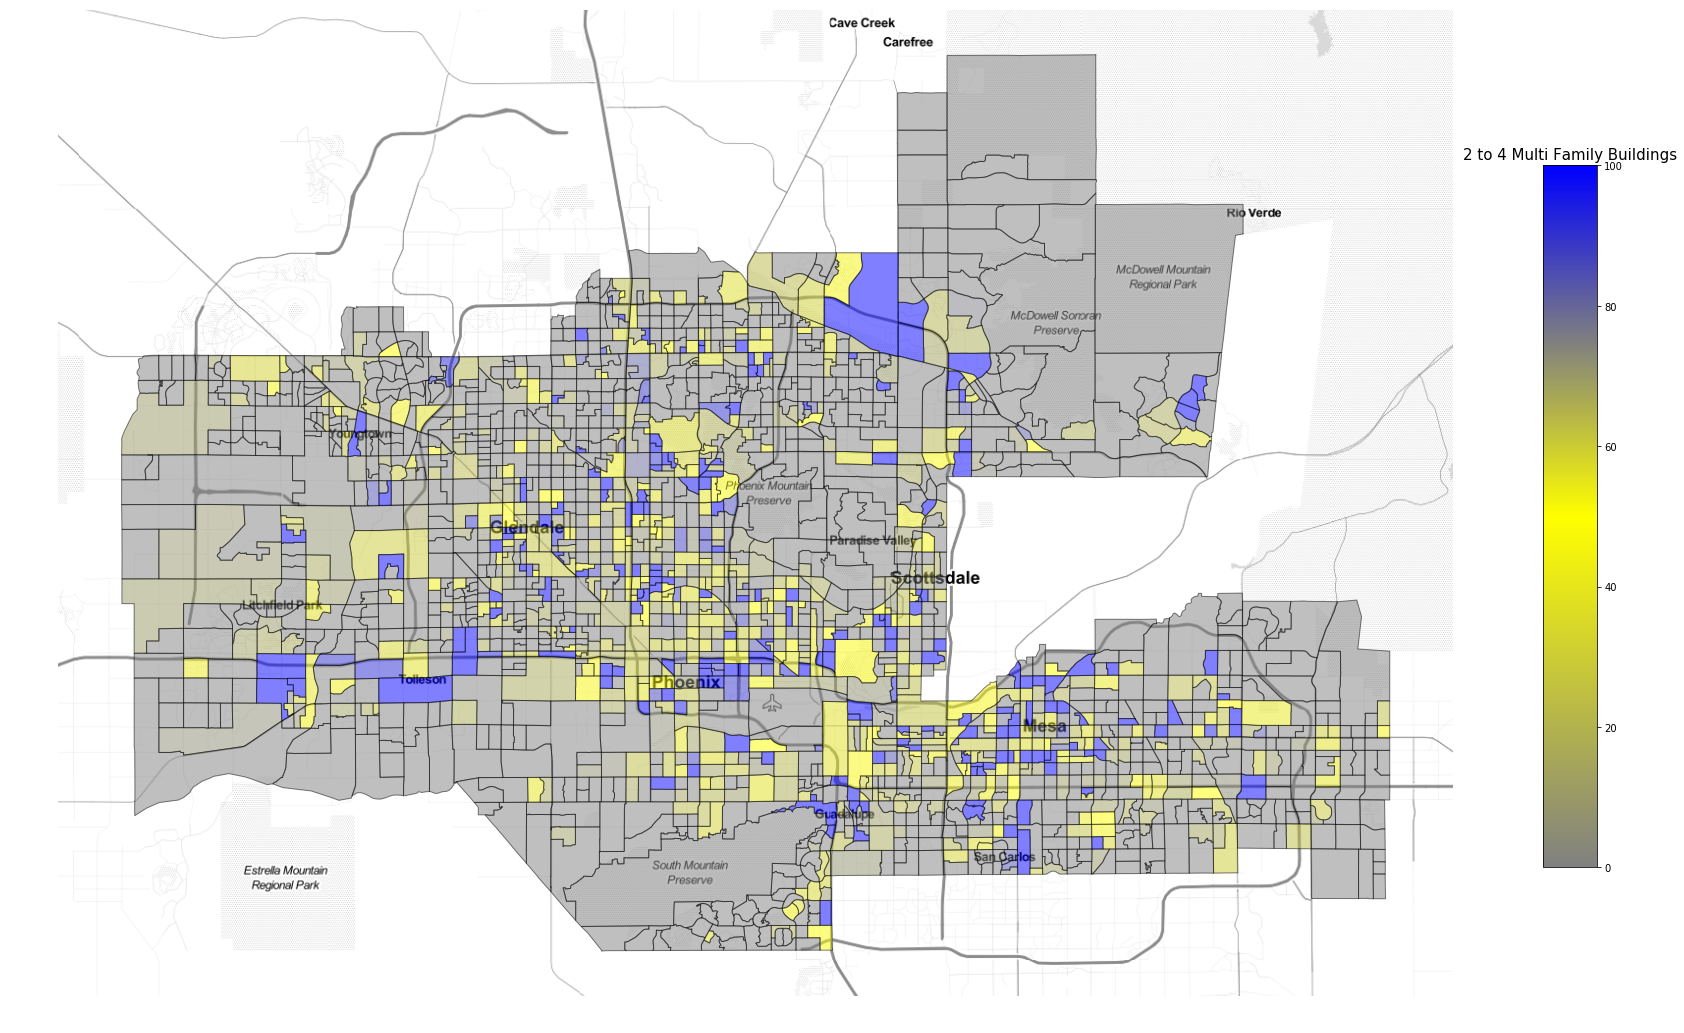

In [27]:
bounds=geo.bounds
column = "2_to_4_Multi_Family_Buildings"
vmin = geo[column].min()
vmax = geo[column].max()

ax = geo.plot(
    column=column,
    cmap=cmap,
#     legend=True,
    figsize=(25, 25),
    alpha=0.5,
    edgecolor='black',
    linewidth=1,
#     markersize = geo["TOTAL_POPU"]/1000,
#     color='red',
#     scheme = 'quantiles',
)

add_basemap(ax, zoom=11, url=ctx.sources.ST_TONER_LITE)
ax.set_axis_off()
# ax.set_title("Percentage Structures with/ 5 to 9 Units in Dallas County")
# ax.set_xlim(bounds['minx'].min(), bounds['maxx'].max())
# ax.set_ylim(bounds['miny'].min(), bounds['maxy'].max())
fig = ax.get_figure()
cbax = fig.add_axes([0.95, 0.3, 0.03, 0.39])   
cbax.set_title(column.replace("_"," "), fontsize= 15)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
fig.colorbar(sm, cax=cbax)

plt.savefig('Phoenix_1.jpg')
plt.show()

In [13]:
geo["MULTIS"].mean()

38.261283851554666

In [14]:
geo["MULTIS"].std()

62.25293916819929

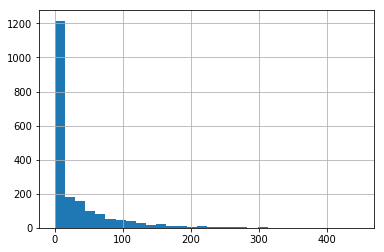

In [9]:
geo["MULTIS"].hist(bins=30)

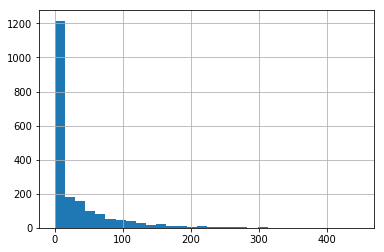

In [10]:
geo["MULTIS"].hist(bins=30)

NameError: name 'df' is not defined

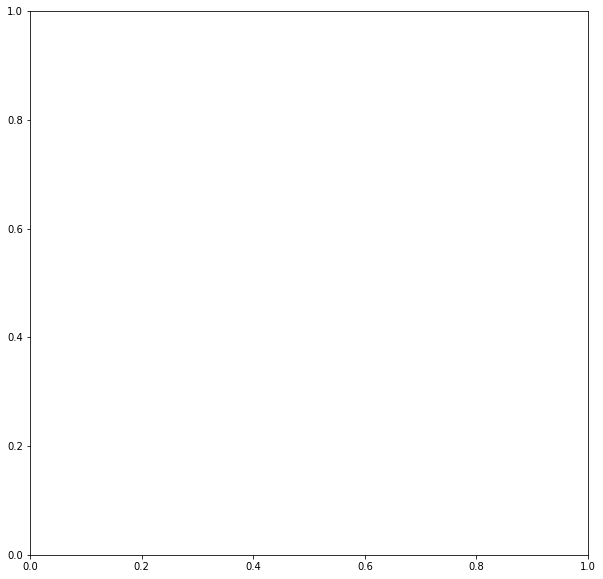

In [11]:
import matplotlib.pyplot as plt

f, ax = plt.subplots(1, figsize=(10,10))

# plt.scatter(
#     df[~df["SCORE"].isnull()][~df["MULTIS"].isnull()]["SCORE"],
#     df[~df["SCORE"].isnull()][~df["MULTIS"].isnull()]["MULTIS"],
# )

plt.bar(
    df[~df["SCORE"].isnull()][~df["MULTIS_Percent"].isnull()][["MULTIS_Percent","SCORE"]].groupby("SCORE").agg(("mean")).reset_index()["SCORE"],
    df[~df["SCORE"].isnull()][~df["MULTIS_Percent"].isnull()][["MULTIS_Percent","SCORE"]].groupby("SCORE").agg(("mean")).reset_index()["MULTIS_Percent"],
)

plt.show()

In [12]:
df[~df["SCORE"].isnull()][~df["MULTIS"].isnull()][["MULTIS","SCORE"]].groupby("SCORE").agg(("median")).reset_index()

NameError: name 'df' is not defined

In [83]:
df["MULTIS_Percent"] = df["MULTIS_Percent"]*100

In [92]:
df[~df["SCORE"].isnull()][~df["MULTIS_Percent"].isnull()][["MULTIS_Percent","RAW_SCORE"]].corr()

C:\Users\Art Perkitny\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,MULTIS_Percent,RAW_SCORE
MULTIS_Percent,1.000000,-0.400073
RAW_SCORE,-0.400073,1.000000


In [93]:
-0.400073**2

-0.160058405329

In [98]:
df[~df["SCORE"].isnull()][~df["MULTIS_Percent"].isnull()][df["SCORE"].isin(["A","B","C"])][["MULTIS"]].sort_values("MULTIS", ascending=False)

C:\Users\Art Perkitny\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,MULTIS
1693,506
387,376
1537,367
344,328
1899,323
885,303
1156,294
267,286
1692,282
802,271


C:\Users\Art Perkitny\Anaconda3\lib\site-packages\geopandas\geodataframe.py:455: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result = super(GeoDataFrame, self).__getitem__(key)


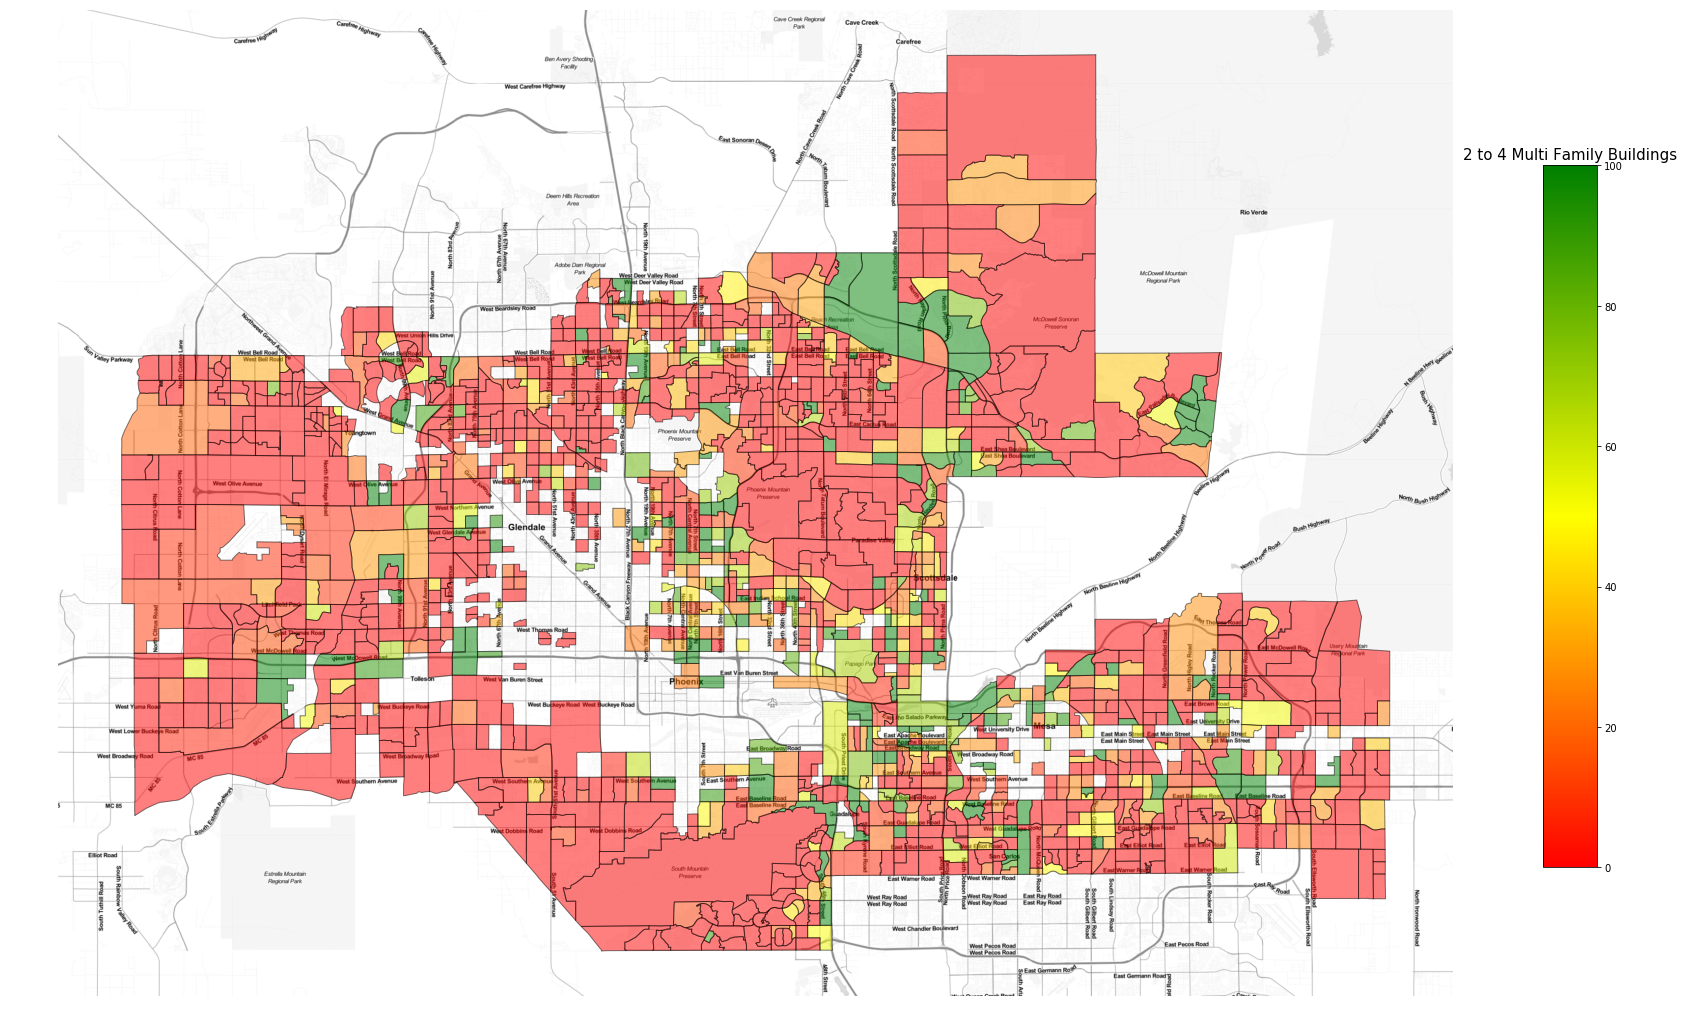

In [109]:
bounds=geo.bounds
column = "2_to_4_Multi_Family_Buildings"
vmin = geo[column].min()
vmax = geo[column].max()

ax = geo[~geo["SCORE"].isnull()][~geo["MULTIS_Percent"].isnull()][geo["SCORE"].isin(["A","B","C"])][["2_to_4_Multi_Family_Buildings","geometry"]].sort_values("2_to_4_Multi_Family_Buildings", ascending=False).plot(
    column=column,
    cmap=cmap,
#     legend=True,
    figsize=(25, 25),
    alpha=0.5,
    edgecolor='black',
    linewidth=1,
#     markersize = geo["TOTAL_POPU"]/1000,
#     color='red',
#     scheme = 'quantiles',
)

add_basemap(ax, zoom=12, url=ctx.sources.ST_TONER_LITE)
ax.set_axis_off()
# ax.set_title("Percentage Structures with/ 5 to 9 Units in Dallas County")
# ax.set_xlim(bounds['minx'].min(), bounds['maxx'].max())
# ax.set_ylim(bounds['miny'].min(), bounds['maxy'].max())
fig = ax.get_figure()
cbax = fig.add_axes([0.95, 0.3, 0.03, 0.39])   
cbax.set_title(column.replace("_"," "), fontsize= 15)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
fig.colorbar(sm, cax=cbax)

plt.savefig('Phoenix_2.jpg')
plt.show()

In [107]:
geo[~geo["SCORE"].isnull()][~geo["MULTIS_Percent"].isnull()][geo["SCORE"].isin(["A","B","C"])][["MULTIS","SCORE"]].sort_values("MULTIS", ascending=False)

C:\Users\Art Perkitny\Anaconda3\lib\site-packages\geopandas\geodataframe.py:455: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result = super(GeoDataFrame, self).__getitem__(key)


,MULTIS,SCORE
1693,506,C
387,376,B
1537,367,A
344,328,C
1899,323,C
885,303,C
1156,294,C
267,286,C
1692,282,B
802,271,C


In [121]:
geo["2_to_4_Multi_Family_Buildings"].sum()

57983